# Lecture #4: Sampling for Posterior Simulation
## AM 207: Advanced Scientific Computing
### Stochastic Methods for Data Analysis, Inference and Optimization
### Fall, 2019

<img src="fig/logos.jpg" style="height:150px;">

In [4]:
### Import basic libraries
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Administrative Matters

1. **Attendance Quiz:** <br><br>

## Outline
1. Review of Bayesian Modeling
2. Connections to Frequentist Inference
3. Basics of Sampling
4. Inverse CDF Sampling
5. Rejection Sampling
6. Gibbs Sampling

## The Bayesian Modeling Process

In order to make statements about $Y$, the outcome, and $\theta$, parameters of the distribution generating the data, we form the joint distribution over both variables and use the various marginals/conditional distributions to reason about $Y$ and $\theta$.

1. we form the ***joint distribution*** over both variables $p(Y, \theta) = p(Y | \theta) p(\theta)$.

2. we can condition on the observed outcome to make inferences about $\theta$,
$$
p(\theta | Y) = \frac{p(Y, \theta)}{p(Y)}
$$
where $p(\theta | Y)$ is called the ***posterior distribution*** and $p(Y)$ is called the ***marginal data likelihood***.
3. before any data is observed, we can simulate data by using our prior
$$
p(Y^*) = \int p(Y^*, \theta) d\theta = \int p(Y^* | \theta) p(\theta) d\theta
$$
where $Y^*$ represents new data and $p(Y^*)$ is called the ***prior predictive***.
4. after observing data, we can simulate new data simliar to the observed data by using our posterior
$$
p(Y^*|Y) = \int p(Y^*, \theta|Y) d\theta = \int p(Y^* | \theta) p(\theta | Y) d\theta
$$
where $Y^*$ represents new data and $p(Y^*|Y)$ is called the ***posterior predictive***.

## Bayesian Update

<img src="fig/bayes.jpg" style="height:300px;">

## Empirical Estimation of Posterior and Prior Predictives

As we have seen in the Beta-Binomial model, we can simulate the posterior (and prior) predictive rather than compute them analytically. That is, you don't need to know the pdf of $p(Y^*|Y)$. 

The posterior predictive can be represented by **samples** of predictions:

1. we sample values of $\theta_n$ from the posterior, $p(\theta|Y)$.
2. we sample an outcome $Y_n$ from $p(Y|\theta_n)$ for each posterior sample $\theta_n$.

The set $Y_n$ we obtain emprirically represents the posterior predictve distribution $p(Y^*|Y)$. 

## Bayesian Model for (Univariate) Gaussian Likelihood with Known Variance
### The Bayesian Model

Let $Y \sim \mathcal{N}(\mu, \sigma^2)$, with $\sigma^2$ known. We place a normal prior on $\mu$, $\mu\sim\mathcal{N}(m, s^2)$. 

**Question:** is our choice of prior appropriate?

## Bayesian Model for (Univariate) Gaussian Likelihood with Known Variance
**Inference:** The posterior $p(\mu|Y)$ is then:
\begin{aligned}
p(\mu | Y) = \frac{p(Y| \mu)p(\mu)}{p(Y)} = \frac{\overbrace{\frac{1}{\sqrt{2\pi \sigma^2}} \mathrm{exp} \left\{-\frac{(Y - \mu)^2}{2\sigma^2}\right\}}^{\text{likelihood}} \overbrace{\frac{1}{\sqrt{2\pi s^2}} \mathrm{exp} \left\{-\frac{(m - \mu)^2}{2s^2}\right\}}^{\text{prior}}}{p(Y)}
\end{aligned}


We can simplify the posterior as:
\begin{aligned}
p(\mu | Y) &= const *\frac{\mathrm{exp} \left\{ -\frac{s^2(Y - \mu)^2 + \sigma^2(m - \mu)^2}{2s^2\sigma^2}\right\}}{p(Y)} \\
&= const *\mathrm{exp} \left\{ \frac{s^2Y^2 + \sigma^2m^2}{\sigma^2 s^2}\right\}\mathrm{exp} \left\{ -\frac{(s^2 + \sigma^2)\mu^2 - 2(s^2Y + \sigma^2m)\mu}{2s^2\sigma^2}\right\}\\
&= const* \mathrm{exp} \left\{ -\frac{\left(\mu - \frac{s^2Y + \sigma^2m}{s^2 + \sigma^2} \right)^2}{2s^2\sigma^2}\right\}\quad \text{(Completing the square)}
\end{aligned}
Thus, we see that the posterior is a normal distribution, $\mathcal{N}\left(\frac{s^2Y + \sigma^2m}{s^2 + \sigma^2}, s^2\sigma^2\right)$.

## Bayesian Model for (Univariate) Gaussian Likelihood with Known Mean
### The Bayesian Model

Let $Y \sim \mathcal{N}(\mu, \sigma^2)$, with $\mu$ known. We place an inverse-gamma prior on $\sigma^2$, $\sigma^2\sim IG(\alpha, \beta)$. 

**Question:** is our choice of prior appropriate?

## Bayesian Model for (Univariate) Gaussian Likelihood with Known Mean
**Inference:** The posterior $p(\sigma^2|Y)$ is then:
\begin{aligned}
p(\sigma^2 | Y) = \frac{p(Y| \sigma^2)p(\sigma^2)}{p(Y)} = \frac{\overbrace{\frac{1}{\sqrt{2\pi \sigma^2}} \mathrm{exp} \left\{-\frac{(Y - \mu)^2}{2\sigma^2}\right\}}^{\text{likelihood}} \overbrace{\frac{\beta^\alpha}{\Gamma(\alpha)} \left( \sigma^2\right)^{-\alpha -1}\mathrm{exp} \left\{-\frac{\beta}{\sigma^2}\right\}}^{\text{prior}}}{p(Y)}
\end{aligned}

We can simplify the posterior as:

\begin{aligned}
p(\sigma^2 | Y) &= const * \left( \sigma^2\right)^{-(\alpha + 0.5) -1}\mathrm{exp} \left\{-\frac{\frac{(Y-\mu)^2}{2} + \beta}{\sigma^2}\right\}
\end{aligned}

Thus, we see that the posterior is an inverse gamma distribution, $IG\left(\alpha + 0.5, \frac{(Y-\mu)^2}{2} + \beta\right)$.

## Bayesian Model for (Univariate) Gaussian Likelihood with Unknown Mean and Variance

Let $Y \sim \mathcal{N}(\mu, \sigma^2)$, with both parameters unknown. We place a normal prior on $\mu$, $\mu\sim\mathcal{N}(m, s^2)$, and an inverse-gamma prior on $\sigma^2$, $\sigma^2\sim IG(\alpha, \beta)$.

The posterior $p(\sigma^2|Y)$ is then:

\begin{aligned}
p(\mu, \sigma^2 | Y)  = \frac{\overbrace{\frac{1}{\sqrt{2\pi \sigma^2}} \mathrm{exp} \left\{-\frac{(Y - \mu)^2}{2\sigma^2}\right\}}^{\text{likelihood}} \overbrace{\frac{1}{\sqrt{2\pi s^2}} \mathrm{exp} \left\{-\frac{(m - \mu)^2}{2s^2}\right\}}^{\text{prior on $\mu$}}\overbrace{\frac{\beta^\alpha}{\Gamma(\alpha)} \left( \sigma^2\right)^{-\alpha -1}\mathrm{exp} \left\{-\frac{\beta}{\sigma^2}\right\}}^{\text{prior on $\sigma^2$}}}{p(Y)}
\end{aligned}

Can the posterior be simplified so that we recognize the form of the distribution?

## Bayesian Model for Poisson Likelihood
### The Bayesian Model

With the kidney cancer dataset in mind, let $Y\sim Poi(N\theta)$, where $N$ is the total population and $\theta$ is the underlying cancer rate. We place a gamma prior on $\theta$, $\theta \sim Ga(\alpha, \beta)$. 

**Question:** is our choice of prior appropriate?

### Inference
The posterior $p(\theta|Y)$ is then:
\begin{aligned}
p(\theta | Y) = \frac{p(Y| \theta)p(\theta)}{p(Y)} = \frac{\overbrace{\frac{(N\theta)^Y}{Y!} \mathrm{exp} \left\{-N\theta\right\}}^{\text{likelihood}} \overbrace{\frac{\beta^\alpha}{\Gamma(\alpha)} \left( \theta\right)^{\alpha -1}\mathrm{exp} \left\{-\beta\theta\right\}}^{\text{prior}}}{p(Y)}
\end{aligned}

We can simplify the posterior as:

\begin{aligned}
p(\theta | Y) &= const * \theta^{\alpha + Y - 1}\mathrm{exp}\left\{-(N+ \beta)\theta \right\}
\end{aligned}

Thus, we see that the posterior is a gamma distribution, $Ga\left(\alpha + Y, N + \beta\right)$.

## Where do Priors Come From?

Hopefully you've noticed a key property of the priors we chose:

>  All the priors combined with the likelihood to form a distribution we recognize! Specifically, the posterior distribution is of the same type as the prior!

These priors are called ***conjugate priors*** for the corresponding likelihoods. This is a purely mathematical property.

**Question:** is it right to choose priors that are mathematically convenient? What is a good way to choose a prior? What if we "choose wrong"?

## Uninformative Priors: How to Say I Don't Know

If you don't have a strong prior believe about the parameters in the likelihood, you should choose a prior that has no effect when combined with the likelihood -- i.e. **let the data speak for itself**.

**Example:**
In the Beta-Binomial model, is there a choice of the hyperparameters of the prior that has no effect on the posterior?

We might try $Beta(1, 1)$, which is the uniform distribution over $[0, 1]$. The posterior $p(\theta|Y)$ is then $Beta(Y + 1, N - Y + 1)$. In the following example, visualizing the posterior, we see that the posterior assigns the highest mass to the MLE of $\theta$. But the posterior assigns more mass to values of $\theta$ smaller than the MLE. In this sense, the prior **does** inform the posterior. 

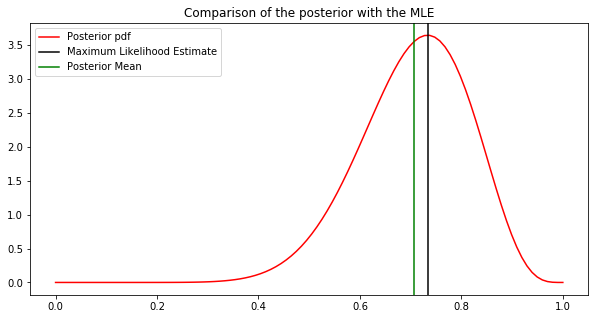

In [5]:
Y = 11
N = 15
MLE = Y * 1. / N
posterior = sp.stats.beta(Y + 1, N - Y + 1).pdf
posterior_mean = (Y + 1.) / (N + 2.)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 1, 100)
ax.plot(x, posterior(x), color='red', label='Posterior pdf')
ax.axvline(x=MLE, color='black', label='Maximum Likelihood Estimate')
ax.axvline(x=posterior_mean, color='green', label='Posterior Mean')
ax.set_title('Comparison of the posterior with the MLE')
ax.legend(loc='best')
plt.show()

There is a general purpose technique for creating non-informative priors, called ***Jeffreys priors***, which places less prior weight on parameter values where the likelihood function is flat. This prevents the prior from having undue influency on the posterior.

There are many resources that cover the construction of Jeffreys priors for common likelihoods.

# Connections with Frequentist Inference

## Point Estimates from the Posterior
If you absolutely wanted to derive a point estimate for the parameters $\theta$ in the likelihood from your Bayesian model, there are two common ways to do it:

1. ***the posterior mean***
$$
\theta_{\text{post mean}} = \mathbb{E}_{\theta\sim p(\theta|Y)}\left[ \theta|Y \right] = \int \theta p(\theta|Y) d\theta
$$
2. ***the posterior mode*** or ***maximum a posterior (MAP)*** estimate
$$
\theta_{\text{MAP}} = \mathrm{argmax}_{\theta} p(\theta|Y)
$$

**Question:** is it better to summarize the entire posterior using a point estimate? I.e. why should we keep the posterior distribution around?

## Point Estimates Can Be Misleading

The posterior mode can be an atypical point: 
<img src="fig/map.jpg" style="height:250px; width:450px">

## Point Estimates Can Be Misleading

The posterior mean can be an unlikely point: 

<img src="fig/mean.jpg" style="height:250px; width:450px">

## Comparison of Posterior Point Estimates and MLE

1. **Beta-Binomial Model for Coin Flips**
 - Likelihood: $Bin(N, \theta)$ 
 - Prior: $Beta(\alpha, \beta)$
 - MLE: $\frac{Y}{N}$
 - MAP: $\frac{Y + \alpha - 1}{N + \alpha + \beta - 2}$
 - Posterior Mean: $\frac{Y + \alpha}{N + \alpha + \beta}$ 
 
 
 2. **Poisson-Gamma Model for Cancer Rates**
  - Likelihood: $Poi(N\theta)$ 
  - Prior: $Ga(\alpha, \beta)$
  - MLE: $\frac{Y}{N}$
  - MAP: $\frac{Y + \alpha - 1}{N + \beta}$
  - Posterior Mean: $\frac{Y + \alpha}{N + \beta}$ 

**Question:** What is the effect of the prior on the posterior point estimates? Imagine if $Y=10$, $N=11$, $\alpha=100$, $\beta=300$. What if $Y=1,000$, $N=11,000$, $\alpha=1$, $\beta=3$?

## The Coin Toss Example: Revisited Yet Again
Recall that one way to prevent the MLE from overfitting is to add ***regularization terms***:
$$
\theta_{\text{MLE Reg}} = \frac{Y + \alpha}{N + \beta}.
$$
This is very similar to the MAP and posterior mean estimates:
 - MAP: $\frac{Y + \alpha - 1}{N + \alpha + \beta - 2}$
 - Posterior Mean: $\frac{Y + \alpha}{N + \alpha + \beta}$ 

In fact, we have see that one effect of adding a prior is that it **regularizes** our inference about $\theta$.

**Question:** What happens to the MAP and posterior mean estimates as $N$ (and hence $Y$) becomes very large?

$$
\lim_{N\to \infty} \frac{Y + \alpha - 1}{N + \alpha + \beta - 2} = ?
$$

## Law of Large Numbers for Bayesian Inference

In general, in Bayesian inference we are **less interested asymptotic behavior**. But the properties of the asymptotic distribution of the posterior can be useful.

**Theorem: (Berstein-von Mises**)

*"Under some conditions, as $N\to \infty$ the posterior distribution converges to a Gaussian distribution centred at the MLE with covariance matrix given by a function of the Fisher information matrix at the true population parameter value."*

**Consequences**
1. The posterior point estimates approach the MLE, with large samples sizes. <br><br>
2. It may be valid to approximate the posterior with a Gaussian, with large samples sizes. This will become a very important idea during the second half of the course!

## Computational Comparisons

1. **Computation of the MLE is an optimization problem.** Although difficult, there are many established methods for performing optimization (even when the objective function is not convex -- i.e. many local optima). 

  More importantly, there are algorithms to perform general, automatic optimization (e.g. gradient descent) on a large class of functions -- that is, we do not need to artisanally solve an optimization problem for each statistical model.<br><br>
  
2. **Computation of the posterior (thus far) is an process of choosing the right priors and noting that the posterior distribution is of the same type as the prior.** The derivation is simple so long as we use conjugate priors. But many intuitively appropriate priors (like the inverse gamma and normal priors for a univariate gaussian) are not conjugate. In those cases, it becomes intractable to
 - compute posterior mode or mean
 - simulate samples from the posterior (and hence simulate samples from the posterior predictive)

# Basics of Sampling

## What is Sampling?

Given a distribution $p(x)$ over a space $\mathbb{R}^D$, ***sampling*** $x \sim p(x)$ means to generate a random $x\in \mathbb{R}^D$, such that the asymptotic frequencies of the samples generated is described by the pdf $p(x)$.

A ***sampler*** is an algorithm or procedure that produces numbers with a certain distribution $p(x)$.

In practice, "random numbers" are simulated using deterministic algorithms called ***pseudo number generators***. A pseudo number generator takes an initial value, the ***random seed***, and produces an array of random looking numbers (from a uniform distribution).

**Note:** for a given pseudo number generator, if the random seed is fixed then the random number output will also be fixed.

## Simulating a Uniform Random Variable: Linear Congruence

Fix an integer $c > N$ and fix integers $a, b > 0$. 
1. seed: set an integer $0\leq s_0 < c$
2. iterate $N$ times: $s_n = (as_{n-1} + b)_{\text{mod } c}$

Output is an array of random integers $[s_0, \ldots, s_N]$ in $[0, c]$. 

For an array of random real numbers in $[0, 1]$, we compute $\left[\frac{s_0}{c}, \ldots, \frac{s_N}{c}\right]$. 

We'll see that **the simulation of all random variables is based on the simulation of the uniform distribution over $[0, 1]$**!

**Note:** the apparent randomness of the output is sensitive to choices of $a, b, c$.

In [15]:
#parameters of linear congruence algorithm
c = 100
a = 11
b = 5
#total number of simulations
N = 10
#random seed
s_current = 3
#array of random numbers
random_numbers = []

#run the linear congruence algorithm N times
for n in range(N):
    s_next = (a * s_current + b) % c
    random_numbers.append(s_next)
    s_current = s_next
    
#convert random integers to random real values in [0, 1]    
random_numbers = np.array(random_numbers) * 1.
random_numbers /= c
#print
random_numbers

array([0.38, 0.23, 0.58, 0.43, 0.78, 0.63, 0.98, 0.83, 0.18, 0.03])

# Inverse CDF Sampling

## The Cumulative Distribution Function

Recall that the ***cumulative distribution function (CDF)*** of a real-valued random variable $X$ with continuous pdf $f_X$ is defined as
$$
F_X(a) = \mathbb{P}[X \leq a] = \int_{-\infty}^a f_X(t) dt
$$
<img src="fig/cdf.jpg" style="height:300px">

## Inverse CDF Sampling: An Intuition
The idea behind Inverse CDF Sampling is that while it is sometimes difficult to generate values for $X$ with the relative frequency described by pdf, $f_X$, it can be easier to generate values for $X$ using the CDF. 

The intuition is as follows:

1. While the support of the pdf and CDF can be unbounded, the range of the CDF is bounded between 0 and 1.<br><br>
2. The CDF for a continuous single-variable pdf is an invertible function (on the support of the pdf). That is, each value between 0 and 1 corresponds to a unique value of the random variable $X$.<br><br>
3. Values of $X$ that lie under peaks of the pdf occupy larger portions of the interval [0, 1]. That is, the range of the CDF, [0, 1], can be subdivided to exactly reflect the areas of high probability mass and low probability mass under the pdf. 

So if we uniformly sample values in the range of the CDF, [0, 1] and find the corresponding $X$ values for these samples (using the inverse function of the CDF), we obtain samples of $X$. 

## Inverse CDF Sampling: An Intuition
<img src="fig/inverse_cdf.jpg" style="height:350px">

## Inverse CDF Sampling: Algorithm

We use a random variable $U$ with uniform distribution over $[0, 1]$ to simulate a univariate random variable $X$ with pdf $f_X$, where:
- we know the analytical form of the CDF of $X$, $F_X$.
- we know the analytical form of the inverse of the CDF of $X$, $F^{-1}_X$.

To simulate $X$, we repeat for $N$ number of samples:
1. sample 
$$U_n \sim U(0, 1)$$
2. compute 
$$X_n = F^{-1}_X(U_n)$$

**Question:** How do we simulate multivariate random variables? What if we don't have the analytical form of $F^{-1}_X$?

## Inverse CDF Sampling: Proof of Correctness

**Theorem:**  Let $F_X$ be the continuous and strictly increasing CDF of a real-valued random variable $X$. Let $F_X^{−1} : [0,1] \to \mathbb{R}$ be the inverse function of $F_X$. Let $U \sim U(0,1)$, then the random variable $Y = F_X^{−1}(U)$ has CDF $F_X$.

***Proof:*** Recall that the CDF of $Y$ is defined by $F_Y(x) = \mathbb{P}[Y \leq x]$. Now, we can write

\begin{aligned}
F_Y(x) &= \mathbb{P}[Y \leq x]&\\ 
&= \mathbb{P}[F_X^{−1}(U) \leq x],&(\text{since $Y = F_X(U)$})\\
&= \mathbb{P}[F_X(F_X^{−1}(U)) \leq F_X(x)],&(\text{since $F_X$ is strictly increasing})\\
&= \mathbb{P}[U \leq F_X(x)],&(\text{since $F_X^{-1}$ is the inverse of $F_X$})\\
&= F_X(x)& (\text{since $0\leq F_X\leq 1$ and by the properties of uniform RV's})
\end{aligned}

## Simulating an Exponential Random Variable
We'll use a uniform random variable $U\sim U(0, 1)$ to simulate a exponential variable $X\sim Exp(\lambda)$. Recall that the exponential CDF is
$$
F_X(x) = 1 - e^{-\lambda x}.
$$

The inverse of the CDF can be found by solving for the input, $x$, of the CDF
\begin{aligned}
y &= 1 - e^{-\lambda x}\\
e^{-\lambda x} &= 1 - y\\
-\lambda x &= \log(1 - y)\\
x &= -\frac{1}{\lambda}\log(1 - y)
\end{aligned}
where we take $\log$ to be base $e$.

Thus, $F_X^{-1}(y) = -\frac{1}{\lambda}\log(1 - y)$.

In [32]:
N = 500
lam = 0.5
#get the exponential pmf function from scipy.stats
exp_pmf = sp.stats.expon(scale=1./lam).pdf
#inverse cdf of exponential
inverse_cdf = lambda y: -1. / lam * np.log(1 -  y)
#inverse cdf samples
U = np.random.uniform(0, 1, size=N)
samples = inverse_cdf(U)

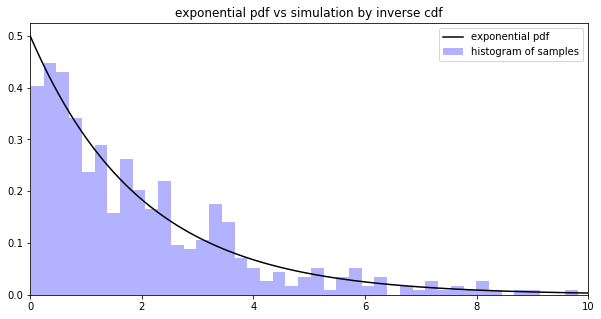

In [33]:
#plot true pdf and samples
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 10, 100)
ax.plot(x, exp_pmf(x), color='black', label='exponential pdf')
ax.hist(samples, bins=50, density=True, color='blue', alpha=0.3, label='histogram of samples')
ax.set_title('exponential pdf vs simulation by inverse cdf')
ax.set_xlim([0, 10])
ax.legend(loc='best')
plt.show()   

## Simulating a Bernoulli Random Variable

The CDF of a discrete random variable $X$ with $K$ possible outputs is a step function:

<img src="fig/bernoulli_cdf.jpg" style="height:350px">

Technically this CDF is not invertible. But we can easily map the output of the CDF to values of $X$. The CDF naturally divides the interval [0, 1] into $K$ parts, each part should be mapped to a case where $X=k$. For example, the Bernoulli CDF divides up the interval into two parts, the first $[0, 1-\theta]$ maps to naturally to $X=0$ and the second $[0, 1-\theta]$ maps to $X=1$.

Thus, to simulate a Bernoulli random variable $X \sim Ber(\theta)$, we
1. sample $U\sim U(0, 1)$
2. if $U<1-\theta$ we map to $X=0$, otherwise we map to $X=1$

This process is easily extended to categorical variables with $K$ categories.

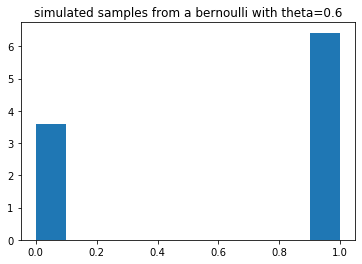

In [79]:
#Bernoulli distribution
theta = 0.6
#number of samples
N = 500

#simulate N number of uniform RVs
u = np.random.uniform(0, 1, size=N)
#for each uniform sample, determine if it is heads or tails by comparing to theta
heads = u < theta
tails = u >= theta
u[heads] = 1
u[tails] = 0

#plot samples
plt.hist(u, density=True)
plt.title('simulated samples from a bernoulli with theta={}'.format(theta))
plt.show()    

## What Can We Simulate?

We can simulate sampling from univariate continuous distributions with closed form inverse CDF's, e.g. exponential random variables. We can't simulate normal random variables since **the normal CDF does not have a closed form inverse**! We can't simulate multivariate random variables.

We can simulate discrete random variables.

# Rejection Sampling

## Rejection Sampling: An Intuition
The idea behind Rejection Sampling is to by-pass the problem of sampling from a difficult distribution $f_X$, by:

1. approximating $f_X$ (called the ***target distribution***), with a pdf $g$ (called the ***proposal distribution***) that is easy to sample
2. sample from $g$ and reject the samples that are unlikely to be from $f_X$


<img src="fig/rejection.jpg" style="height:350px">

## Rejection Sampling: Algorithm

We can use rejection sampling to simulate multivariate random variables and random variables for which we don't have a closed form for $F^{-1}_X$. We choose a proposal distribution $g$ such that (1) the support of $g$ covers the support of $f$ and (2) there is a constant $M > 0$ with $\frac{f_X(y)}{g(y)} \leq M$ for all $y$. 

In less high-falutin talk: we need (1) $g$ to be non-zero where ever $f$ is and $g$ must decay slower than $f$ (2) M * g is an upper bound of $f$.

To simulate $X$, we repeat until $N$ samples are accepted:
1. sample $Y_k \sim g(Y)$
2. sample a random height, $U_k \sim U(0, 1)$
3. if $U_k < \frac{f_X(Y_k)}{Mg(Y_k)}$ then accept $Y_k$ as a sample, else reject

**Question:** How long does it take to accumulate $N$ samples? What is the effect of the choice of the proposal distribution $g$ have on the sampling process? Now that we can sample from any distribution, this class is over right?

## Rejection Sampling: Proof of Correctness

We need to show that the accepted samples $Y$ have same distribution as $X$. In particular, we'll show that the CDF of the accepted samples is equal to $F_X$:
$$
\mathbb{P}\left[ Y \leq a\; \left\vert\; U \leq \frac{f_X(Y)}{Mg(Y)}\right. \right] = F_X(a).
$$
Using Baye's rule for probabilities, we get that
\begin{aligned}
\mathbb{P}\left[\left.U \leq \frac{f_X(Y)}{Mg(Y)} \; \right\vert\; Y \leq a  \right] &= \frac{\mathbb{P}\left[Y \leq a,\; U \leq \frac{f_X(Y)}{Mg(Y)} \right]}{\mathbb{P}\left[ Y \leq a\right]}\\
&= \int_{-\infty}^a \frac{\mathbb{P}\left[\left.U \leq \frac{f_X(Y)}{Mg(Y)} \; \right\vert\; Y \leq y \leq a  \right] g(y)}{\mathbb{P}\left[ Y \leq a\right]} dy\\
&= \frac{1}{\mathbb{P}\left[ Y \leq a\right]}\int_{-\infty}^a \mathbb{P}\left[\left.U \leq \frac{f_X(Y)}{Mg(Y)} \; \right\vert\; Y \leq y \leq a  \right] g(y) dy\\
&= \frac{1}{\mathbb{P}\left[ Y \leq a\right]} \int_{-\infty}^a \frac{f_X(y)}{Mg(y)} g(y) dy\\
&= \frac{1}{M\mathbb{P}\left[ Y \leq a\right]} \int_{-\infty}^a f_X(y) dy\\
&= \frac{1}{M\mathbb{P}\left[ Y \leq a\right]} \mathbb{P}\left[ X \leq a\right]\\
&= \frac{F_X(a)}{MG(a)}
\end{aligned}
where $G$ is the CDF of the proposal pdf $g$.

Now, we can write:
\begin{aligned}
\mathbb{P}\left[ Y \leq a\; \left\vert\; U \leq \frac{f_X(Y)}{Mg(Y)}\right. \right] &= \frac{\mathbb{P}\left[\left.U \leq \frac{f_X(Y)}{Mg(Y)} \; \right\vert\; Y \leq a  \right] \mathbb{P}\left[ Y \leq a\right]}{\mathbb{P}\left[U \leq \frac{f_X(Y)}{Mg(Y)}\right]}\\
&= \frac{\frac{F_X(a)}{MG(a)} * G(a)}{1/M}\\
&= F_X(a)
\end{aligned}
which is exactly what we wanted to show.

## Rejection Sampling: Efficiency

Given a proposal $Y=y$, the probability of accepting it is 
$$
\mathbb{P}\left[\left.U\leq \frac{f(Y)}{cg(Y)} \right\vert Y=y\right] = \frac{f(y)}{Mg(y)}.
$$

So the overall probability $p$ of accepting any given proposal can be computed by integrating out $y$:

\begin{aligned}
p &= \int_{\mathbb{R}} \frac{f(y)}{Mg(y)} g(y)dy \\
&= \frac{1}{M} \int_{\mathbb{R}} f(y) dy\\
&= \frac{1}{M}
\end{aligned}

We see that the expected number of times it takes to draw and accept a sample $X=x$ is precisely $M$. This means that roughly $(M-1)/M$ of samples drawn from $g$ will be rejected. When $M$ is large, the rejection sampler is very inefficient.



## Simulating a Normal Random Variable

We note that if we can simulate a standard normal variable $X\sim \mathcal{N}(0, 1)$, then we can simulate any normal variable $Y\sim \mathcal{N}(\mu, \sigma^2)$ by setting $Y = \sigma* X + \mu$. 

We also observe that since the standard normal distirbution is symmetric about $X=0$, we only need to simulate samples from the non-negative side of $\mathcal{N}(0, 1)$ and then independently sample a sign (+ or -) for each sample using a Bernoulli distribution with $\theta = 0.5$. 

Simulating the positive half of the normal distribution means we need to scale the normal pdf by a factor of 2, so that is integrates to 1 over the nonnegative real numbers.

A natural candidate for a pdf to cover the non-negative half of the standard normal pdf is the exponential pdf.

In [99]:
#target distribution
target_pdf = sp.stats.norm(loc=0, scale=1).pdf
#proposal distirbution
proposal_pdf = sp.stats.expon(scale=1 / 0.5).pdf
#scaling constant
M = 2.

#total number of samples we want
N = 500
samples = []
#repeat rejection sampling until total number of samples is attained
while len(samples) < N:
    #sample x from proposal distribution
    proposed_sample = sp.stats.expon.rvs(scale=1 / 0.5, size=1)
    #sample a random height at x
    u = np.random.uniform(0, 1)
    #accept if height is below target distribution
    #remember that we are comparing the exponential distribution to the right half of the normal pdf
    #so we need to scale the normal pdf by a factor of 2 to make it a proper pdf over the nonnegative numbers
    if u < target_pdf(2 * proposed_sample) / (M * proposal_pdf(proposed_sample)):
        #if we are accepting randomly append a negative sign to the sample
        samples.append(proposed_sample * np.random.choice([-1, 1], size=1))
        
samples = np.array(samples)

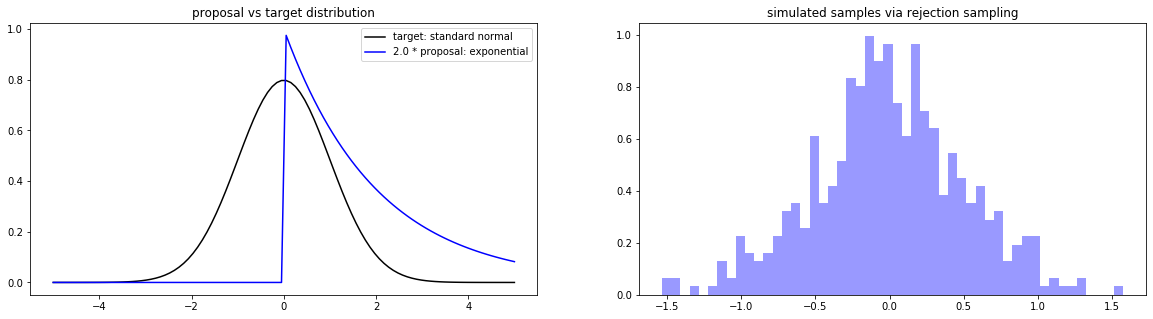

In [98]:
#plot samples
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
x = np.linspace(-5, 5, 100)
ax[0].plot(x, 2 * target_pdf(x), color='black', label='target: standard normal')
ax[0].plot(x, M * proposal_pdf(x), color='blue', label='{} * proposal: exponential'.format(M))
ax[0].set_title('proposal vs target distribution')
ax[0].legend(loc='best')
ax[1].hist(samples, bins=50, density=True, color='blue', alpha=0.4)
ax[1].set_title('simulated samples via rejection sampling')
plt.show()   

## What Can We Simulate?

We can simulate any continuous or discrete random variable as long as we can find a suitable proposal distribution.

But as the dimensions of the random variable increases or for inappropriate choices of the proposal distribution, the efficiency of this sampler may be very low.

## Limitations of Rejection Sampling in High Dimensions

Since the acceptance rate for rejection sampling is 1/M, where $M$ is a constant that bounds $\frac{f_X(y)}{g(y)}$ for all $y$, we'd want to make $M$ as close to $1$ as possible, i.e. we want $g(y)$ to be approximately equal to $f_X(y)$. In general this is very difficult to achieve, especially in high dimensions.

**Example:**

Let's say our target distribution is a $D$-dimensional Gaussian $\mathcal{N}\left(0, \sigma_f^2\mathbf{I}_{D\times D}\right)$, where $\mathbf{I}_{D\times D}$ is a $D\times D$ identity matrix. Let's fix the proposal distribution to be a $D$-dimensional Gaussian $\mathcal{N}\left(0, \sigma_g^2\mathbf{I}_{D\times D}\right)$, where $\sigma_g > \sigma_f$. We can compute the optimum value of $M$ to be $\left(\frac{\sigma_g}{\sigma_f}\right)^D$. But this is a value that scales with $D$! For example, if $D=1,000$ and $\frac{\sigma_g}{\sigma_f} = 1.01$ then the probability of accepting a sample will be $\frac{1}{M} = 0.000047$.

# Gibbs Sampling

## Semi-Conjugate Priors

Let $Y \sim \mathcal{N}(\mu, \sigma^2)$, with both parameters unknown. We place a normal prior on $\mu$, $\mu\sim\mathcal{N}(m, s^2)$, and an gamma prior on $\sigma^2$, $\sigma^2\sim IG(\alpha, \beta)$.

The posterior $p(\mu, \sigma^2|Y)$ is then:

\begin{aligned}
p(\mu, \sigma^2 | Y)  = \frac{\overbrace{\frac{1}{\sqrt{2\pi \sigma^2}} \mathrm{exp} \left\{-\frac{(Y - \mu)^2}{2\sigma^2}\right\}}^{\text{likelihood}} \overbrace{\frac{1}{\sqrt{2\pi s^2}} \mathrm{exp} \left\{-\frac{(m - \mu)^2}{2s^2}\right\}}^{\text{prior on $\mu$}}\overbrace{\frac{\beta^\alpha}{\Gamma(\alpha)} \left( \sigma^2\right)^{-\alpha -1}\mathrm{exp} \left\{-\frac{\beta}{\sigma^2}\right\}}^{\text{prior on $\sigma^2$}}}{p(Y)}
\end{aligned}

Note that:

1. if we condition on $\sigma^2$ (i.e. hold it constant) then $p(\mu| Y, \sigma^2)$ is a normal pdf, $\mathcal{N}\left(\mu; \frac{s^2y + \sigma^2m}{s^2 + \sigma^2}, s^2\sigma^2\right)$.
2. if we condition on $\mu$ (i.e. hold it constant) then $p(\sigma^2| Y, \mu)$ is an inverse gamma pdf, $IG\left(\sigma^2; \alpha + 0.5, \frac{(y-\mu)^2}{2} + \beta\right)$

That is, **the conditional of the posterior are easy to sample from while the joint posterior is not**. In this case, we call the priors ***semi-conjugate*** for our likelihood.

## Gibbs Sampling: An Intuition
If we start at a point $(x^{(0)}, y^{(0)})$ sampled from from the joint distribution $p(X, Y)$, we can get to the next point $(x^{(1)}, y^{(1)}) \sim p(X, Y)$ through a "stepping-stone" $(x^{(1)}, y^{(0)})$, where we updated the first coordinate by $x^{(1)} \sim p(X|Y = y^{(0)})$. From there, we update the second coordinate $y^{(1)} \sim p(Y|X = x^{(1)})$.

The initial samples may be unlikely under $p(X, Y)$, but this process will eventually lead us to a high density area in $p(X, Y)$ and we will mostly sample there.
<img src="fig/gibbs.jpg" style="height:350px">

## Gibbs Sampling: Algorithm

To simulate $N$ samples of a $D$-dimensional multivariate random variable $X$ with pdf $f_X$, we
1. initialization: choose any $x^{(0)} = \left[x^{(0)}_1\;\; \ldots\;\; x^{(0)}_D\right]$
2. iterate $N$ times: sample $x^{(n+1)} = \left[x^{(n+1)}_1\;\; \ldots\;\; x^{(n+1)}_D\right]$ by

  a. initialization: sample $X^{(n+1)}_1$ from the conditional distribution 
  
  $$f_X\left(X_1 \,|\, X_2 = x^{(n)}_2,\;\ldots,\; X_D = x^{(n)}_D\right)$$
  
  b. iterate from $d = 2$ througbh $d=D$: sample $x^{(n+1)}_d$ from the conditional distribution
  
  $$f_X\left(X_d \,|\, X_1 = x^{(n+1)}_1,\; \ldots,\; X_{d-1} = x^{(n+1)}_{d-1},\; X_{d+1} = x^{(n)}_{d+1},\; \ldots,\; X_D = x^{(n)}_D\right)$$
  
**Claim:** When $N$ is large enough, the latter portion of the samples we obtain will be from the distribution of $X$.
  
**Question:** Why is this algorithm a valid sampler? That is, how do we prove that the samples we obtain are actually distributed as $f_X$? What is the effect of the initialization $x^{(0)}$?

## Simulating the Posterior of a Normal-Normal-Inverse Gamma Model
Let $Y \sim \mathcal{N}(\mu, \sigma^2)$, with both parameters unknown. We place a normal prior on $\mu$, $\mu\sim\mathcal{N}(m, s^2)$, and an gamma prior on $\sigma^2$, $\sigma^2\sim IG(\alpha, \beta)$.

1. $p(\mu| Y, \sigma^2)$ is a normal pdf, 
$$\mathcal{N}\left(\mu; \frac{s^2y + \sigma^2m}{s^2 + \sigma^2}, s^2\sigma^2\right).$$
2. $p(\sigma^2| Y, \mu)$ is an inverse gamma pdf, 
$$IG\left(\sigma^2; \alpha + 0.5, \frac{(y-\mu)^2}{2} + \beta\right).$$

We choose an arbitrary initial point $(\mu_0, \sigma^2_0) \in \mathbb{R}^2$, and then sample the next point by  sampling from the conditionals $p(\mu| Y, \sigma^2)$ and $p(\sigma^2| Y, \mu)$, in order.

In [52]:
#total number of gibbs samples
N = 1000
#observation
y = 1.
#inverse gamma prior
alpha = 2.
beta = 3.
#normal prior
s = 1.
m = 2.

#initialize the gibbs sampler
current_mu = 0.
current_sigma_sq = 1. 
posterior_samples = [(current_mu, current_sigma_sq)]

#run gibbs N times
for n in range(N):
    #sample mu from the posterior conditioned on the current sigma squared
    next_mu = np.random.normal((s**2 * y) / (s**2 + current_sigma_sq), s**2 * current_sigma_sq)
    #sample sigma squared from the posterior conditioned on the updated mu
    next_sigma_sq = sp.stats.invgamma.rvs(alpha + 0.5, scale=1. / ((y - next_mu)**2 / 2. + beta), size=1)
    #the next sample is the updated mu and sigma squared
    current_mu = (next_mu, next_sigma_sq)
    posterior_samples.append(current_mu)
    
posterior_samples = np.array(posterior_samples)[100:, :]

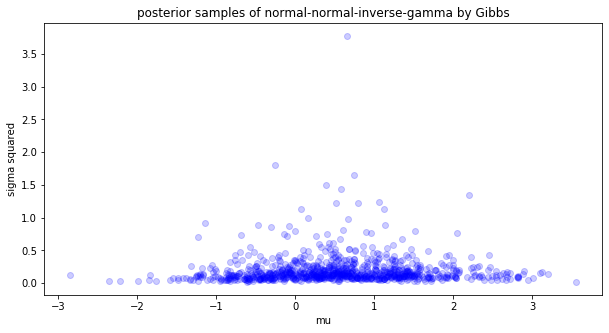

In [53]:
#plot posterior samples via gibbs
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 10, 100)
ax.scatter(posterior_samples[:, 0], posterior_samples[:, 1], color='blue', alpha=0.2)
ax.set_title('posterior samples of normal-normal-inverse-gamma by Gibbs')
ax.set_xlabel('mu')
ax.set_ylabel('sigma squared')
plt.show()   